In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')

### 1. Столбчатая диаграмма
*    **Переменные**: жанры фильмов, количество фильмов в каждом жанре
*    **Цель**: оценить популярность различных жанров фильмов
*    **Выбор данного типа графика** обусловлен тем, что он является хорошим инструментом для сравнения величин и визуализации распределения значений.

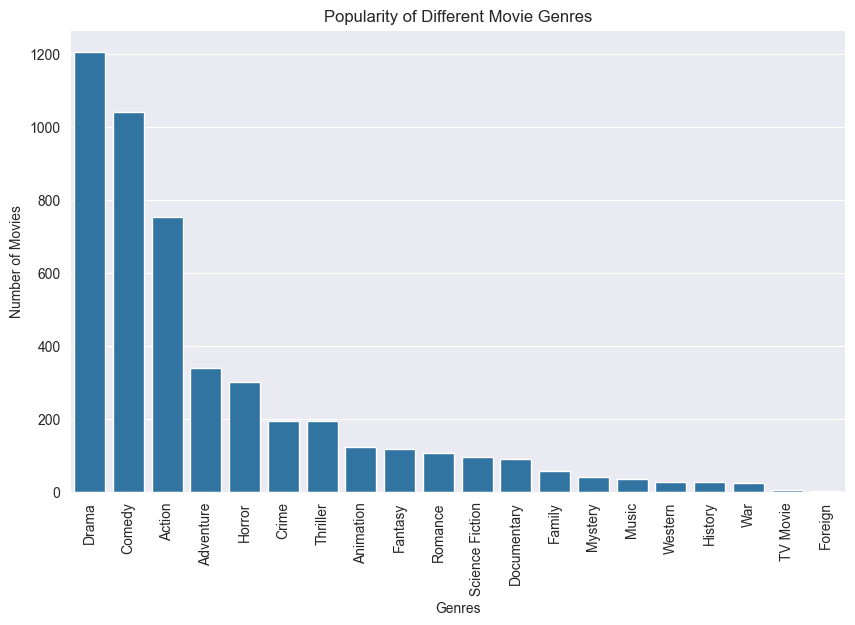

In [18]:
def get_genre_name(x):
    genres_list = json.loads(x)
    if genres_list:
        return genres_list[0]['name']
    else:
        return None


df['genres'] = df['genres'].apply(lambda x: get_genre_name(x))

plt.figure(figsize=(10, 6))
sns.barplot(x=df['genres'].value_counts().index, y=df['genres'].value_counts())
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Popularity of Different Movie Genres')
plt.xticks(rotation=90)
plt.show()

### 2. Круговая диаграмма
   - **Переменные**: жанр и бюджет
   - **Цель**: показать долю бюджета, выделенного на каждый жанр фильма
   - Круговая диаграмма хорошо подходит для показа долевого распределения, что позволяет легко сравнивать доли бюджета, выделенные на каждый жанр.

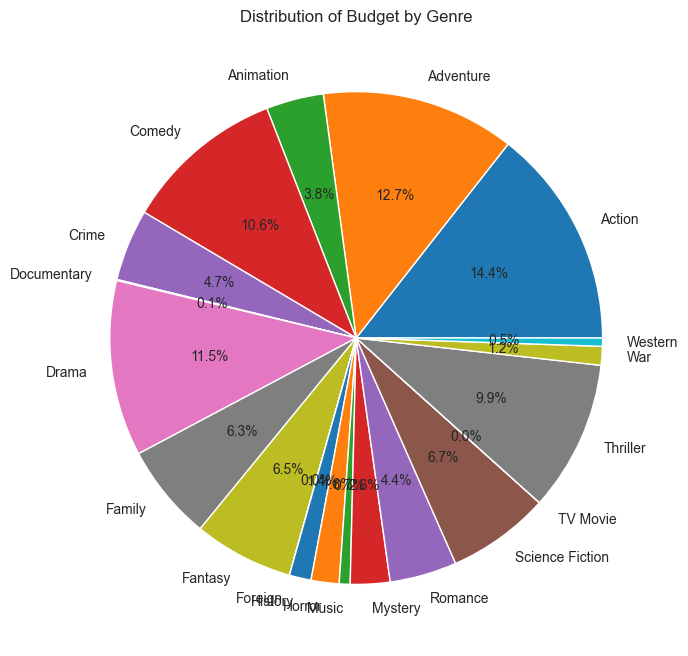

In [3]:
df['genres'] = df['genres'].apply(lambda x: [genre['name'] for genre in eval(x)])

viz_data = df.explode('genres')

budget_by_genre = viz_data.groupby('genres')['budget'].sum()

plt.figure(figsize=(8, 8))
plt.pie(budget_by_genre, labels=budget_by_genre.index, autopct='%1.1f%%')
plt.title('Distribution of Budget by Genre')
plt.show()

### 3. Линейный график
   - **Переменные**: дата выхода фильма, популярность
   - **Цель**: оценить динамику популярности фильмов с течением времени
   - Линейный график хорошо подходит для визуализации изменений величин с течением времени.

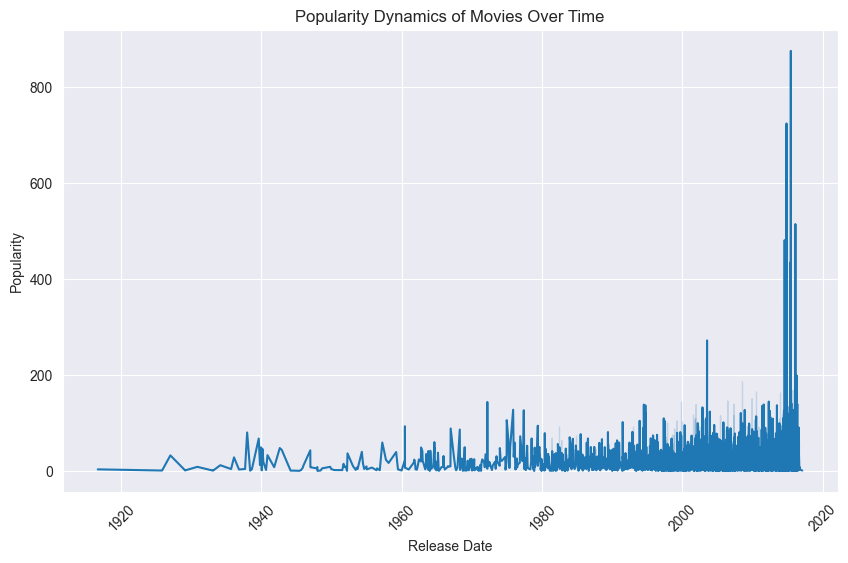

In [5]:
df['release_date'] = pd.to_datetime(df['release_date'])
df = df.sort_values('release_date')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='release_date', y='popularity')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.title('Popularity Dynamics of Movies Over Time')
plt.xticks(rotation=45)
plt.show()

### 4. Точечная диаграмма
   - **Переменные**: бюджет фильма и выручка от фильма
   - **Цель**: исследовать корреляцию между бюджетом и выручкой от фильмов
   - Точечная диаграмма позволяет увидеть взаимосвязь между двумя переменными и определить наличие корреляции.

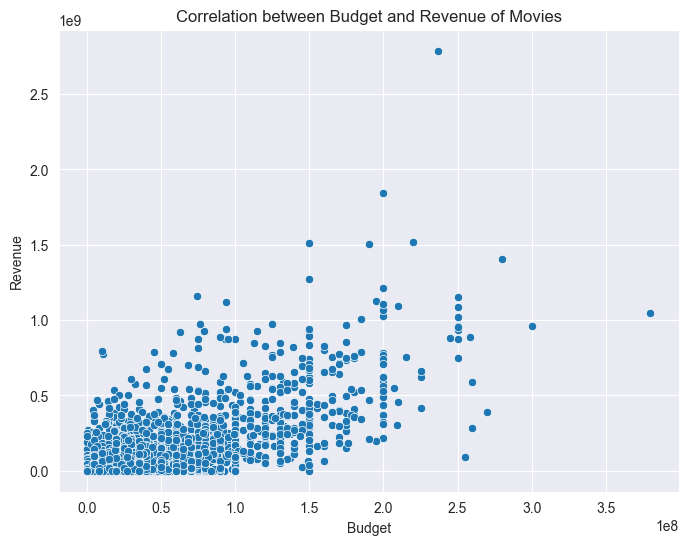

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='budget', y='revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Correlation between Budget and Revenue of Movies')
plt.show()

### 5. Гистограмма
   - **Переменные**: оценка фильма, количество фильмов с определенной оценкой
   - **Цель**: изучить распределение оценок фильмов
   - Гистограмма подходит для визуализации распределения значений, в данном случае - распределения оценок фильмов.

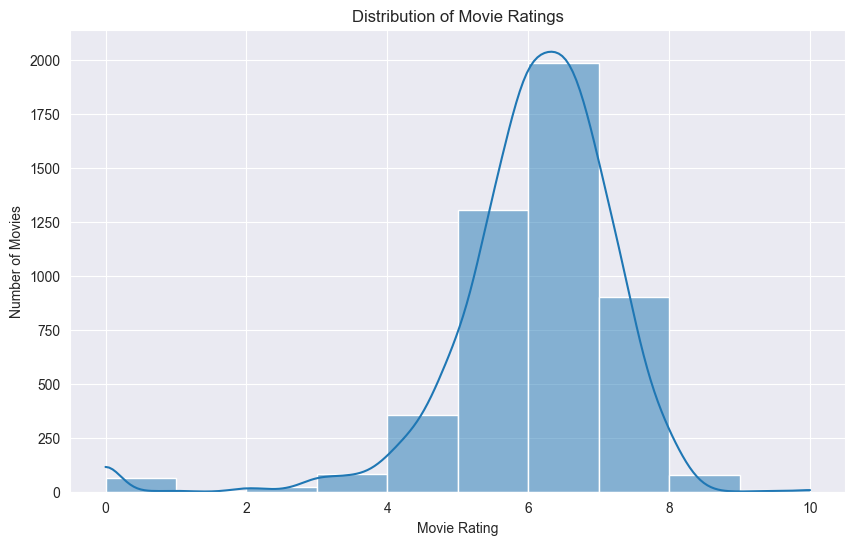

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='vote_average', bins=10, kde=True)
plt.xlabel('Movie Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Ratings')
plt.show()